In [3]:
import tkinter
from tkinter import filedialog
import os
import pandas as pd

root = tkinter.Tk()
root.withdraw() #use to hide tkinter window

currdir = os.getcwd()
tempdir = filedialog.askopenfilename()
df = pd.read_csv (tempdir)

In [19]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import numpy as np
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(fill_value=np.nan, strategy='mean')
data = imputer.fit_transform(df)
x = data[:,[0,2,3]]
y = data[:,1]

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=5)
poly_variables = poly.fit_transform(x)

poly_var_train, poly_var_test, res_train, res_test = train_test_split(poly_variables, y, test_size = 0.2, random_state = 4)

regression = linear_model.LinearRegression()

model = regression.fit(poly_var_train, res_train)
score = model.score(poly_var_test, res_test)

In [13]:
y_pred =  regression.predict(poly_variables)
from sklearn.metrics import r2_score, mean_squared_error,explained_variance_score,mean_absolute_error
print("R2 Score:" + str(r2_score(y,y_pred)))
print("Variance Score:" + str(explained_variance_score(y,y_pred)))
print("Mean Squared Error:" + str(mean_squared_error(y,y_pred)))
print("Mean Absolute Error:" + str(mean_absolute_error(y,y_pred)))

R2 Score:0.9999997859384596
Variance Score:0.9999997859385226
Mean Squared Error:0.00013266826656313304
Mean Absolute Error:0.009972900044327203


In [14]:
y_pred.shape

(799976,)

In [16]:
X = data[:,0]
Y = data[:,3]
Z = y_pred

In [17]:
Y.shape

(799976,)

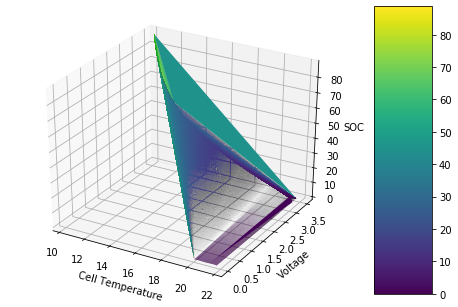

In [21]:
fig = plt.figure()
ax = Axes3D(fig)
surf=ax.plot_trisurf(X,Y,Z, cmap=plt.cm.viridis, linewidth=0.2)
ax.set_xlabel('Cell Temperature')
ax.set_ylabel('Voltage')
ax.set_zlabel('SOC')
fig.colorbar( surf, shrink=1, aspect=5)
fig.savefig('10deg.png')

In [10]:
import pickle

pickle.dump(fig,open('10deg.pickle','wb'))

In [23]:
degree = [10,15,20,25,30]
r2score = []
mse = []

In [7]:
r2score.append(r2_score(res_test,y_pred))
mse.append(mean_squared_error(res_test,y_pred))

In [8]:
r2score

[0.9999999999999994]

In [9]:
mse

[1.0482173726615636e-15]

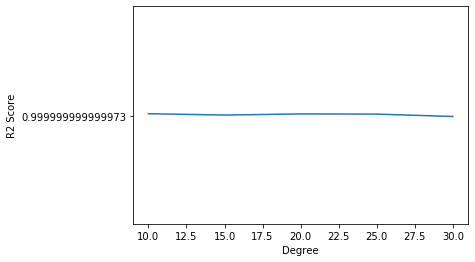

In [124]:
ymin = np.min(r2score)
ymax = np.max(r2score)

fig = plt.figure()
ax = plt.axes()
ax.plot(degree, r2score);
ax.set_yscale('linear')
ax.set_xlabel('Degree')
ax.set_ylabel('R2 Score')
ax.yaxis.set_ticks(np.arange(ymin, ymax,0.00000000001))

Text(0, 0.5, 'MSE')

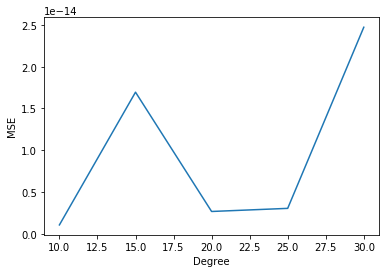

In [163]:
ymin = np.min(mse)
ymax = np.max(mse)

fig = plt.figure()
ax = plt.axes()
ax.plot(degree, mse);
ax.set_yscale('linear')
ax.set_xlabel('Degree')
ax.set_ylabel('MSE')

Text(0, 0.5, 'MSE')

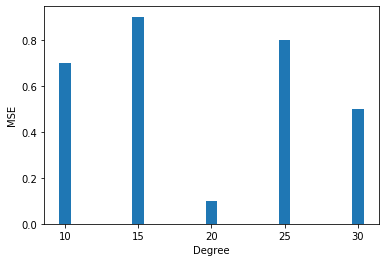

In [24]:
mse = [0.7,0.9,0.1,0.8,0.5]
fig = plt.figure()
ax = plt.axes()
ax.bar(degree, mse);
ax.set_xlabel('Degree')
ax.set_ylabel('MSE')